In [54]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(17)

In [55]:
def sign(y):
  temp = np.zeros(len(y))
  for i in range(len(y)):
   if y[i]>=0:
     temp[i]=1
   else:
     temp[i]=-1
  return temp

x_data = np.arange(0, 2*np.pi, 0.1)
x_data_test = np.arange(0.05, 2*np.pi, 0.1)

x_data_noise = np.arange(0, 2*np.pi, 0.1) + np.random.normal(loc=0.0, scale=0.1 , size=len(x_data))
x_data_test_noise = np.arange(0.05, 2*np.pi, 0.1) + np.random.normal(loc=0.0, scale=0.1 , size=len(x_data_test))


y_data_sin = np.sin(x_data*2)
y_data_sin_test = np.sin(x_data_test*2)


y_data_square = sign(y_data_sin)
y_data_square_test =sign(y_data_sin_test)

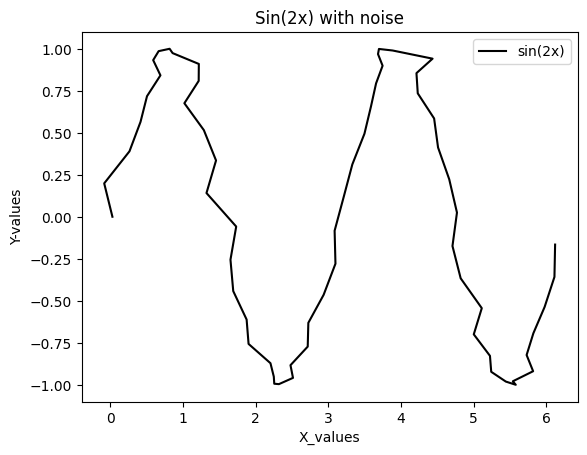

In [56]:
plt.plot(x_data_noise ,y_data_sin, color="black",label="sin(2x)")
plt.title("Sin(2x) with noise")
plt.xlabel("X_values")
plt.ylabel("Y-values")

plt.legend()
plt.show()

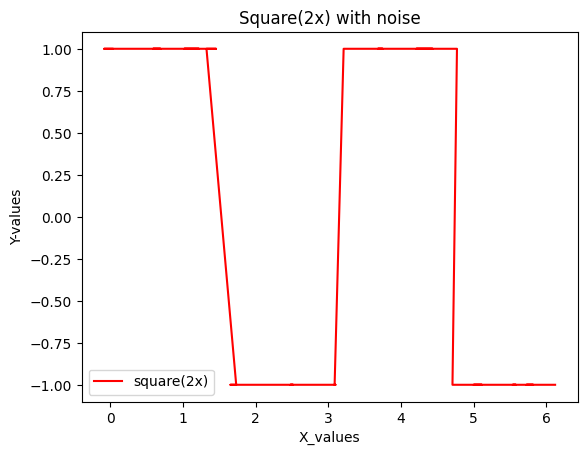

In [57]:
plt.plot(x_data_noise ,y_data_square, color="red",label="square(2x)")
plt.title("Square(2x) with noise")
plt.xlabel("X_values")
plt.ylabel("Y-values")
plt.legend()
plt.show()

In [58]:
def calculate_error(y_p, y):
    return np.divide(np.sum(np.square(y_p-y)), len(y))

pos = [[31],
       [20,40],
       [20,40,60],
       [0,20,40,60],
       [0,12,20,40,60],
       [0,12,24,36,48,60],
       [0,10,20,30,40,50,60],
       [0,8,18,29,40,50,60,62],
       [0,8,18,29,40,46,50,60,62],
       [0,8,18,29,40,46,50,55,60,62],
       [0,8,14,18,25,29,40,46,50,55,60,62],
       [0,4,8,14,18,25,29,40,46,50,55,60,62],
       [0,4,8,14,18,25,29,34,40,46,50,55,60,62],
       [0,4,8,14,18,22,25,29,34,40,46,50,55,60,62],
       [0,4,8,14,18,22,25,29,34,40,43,46,50,55,60,62],
       [0,4,8,14,18,22,25,29,34,38,40,43,46,50,55,60,62],
       [0,3,4,8,14,18,22,25,29,34,38,40,43,46,50,55,60,62],
       [0,3,4,8,10,14,18,22,25,29,34,38,40,43,46,50,55,60,62],
       [0,3,4,8,10,14,18,22,25,29,34,38,40,43,46,50,55,58,60,62],
       [0,3,4,8,10,14,18,22,25,29,32,34,38,40,43,46,50,55,58,60,62]
       ]

In [59]:
class RBF:



  def __init__(self, nodes_n, x_train, y_train, stdv, random):
    self.nodes_n=nodes_n
    self.x_train = x_train
    self.y_train = y_train
    self.stdv = stdv
    self.weights=[]



    if random==True:
     self.nodes_p=np.random.choice(self.x_train, nodes_n,replace=False)
    else:
      self.nodes_p = self.x_train[np.array(pos[nodes_n-1])]





  def calculate_phi_x(self, x_data):

     temp_phi = np.zeros((len(x_data), len(self.nodes_p)))

     for i in range(len(x_data)):
      for j in range(len(self.nodes_p)):
        x =  x_data[i]
        u =  self.nodes_p[j]

        temp_phi[i][j] = np.exp(-( np.divide(np.square(x-u), 2*self.stdv*self.stdv)))
     return temp_phi


  def train(self, phi):

     self.weights = np.linalg.inv(phi.T @ phi) @  phi.T @ self.y_train
     return self.weights


  def predict(self,phi):
    return np.dot(phi,self.weights)

In [60]:
class RBF_delta:



  def __init__(self, nodes_n, x_train, y_train, stdv, random,learning_rate, epochs):
    self.nodes_n=nodes_n
    self.x_train = x_train
    self.y_train = y_train
    self.stdv = stdv
    self.learning_rate = learning_rate
    self.epochs = epochs

    if random==True:
     self.nodes_p=np.random.choice(self.x_train, nodes_n,replace=False)
    else:
      self.nodes_p = self.x_train[np.array(pos[nodes_n-1])]

    self.weights= np.random.normal(loc=0.0, scale=0.1 , size=len(self.nodes_p))





  def calculate_phi_x(self, x_d):

     temp_phi = np.zeros((len(x_d), len(self.nodes_p)))

     for i in range(len(x_d)):
      for j in range(len(self.nodes_p)):
        x =  x_d[i]
        u =  self.nodes_p[j]

        temp_phi[i][j] = np.exp(-( np.divide(np.square(x-u), 2*self.stdv*self.stdv)))
     return temp_phi


  def train(self, phi):
    error = np.zeros(self.epochs)
    for i in range(self.epochs):
      for j in range(len(self.x_train)):

        y_p = np.dot(self.weights, phi[j])
        y = self.y_train[j]
        self.weights += (self.learning_rate * (y-y_p) * phi[j])
      y_total = self.predict(phi)
      error[i] = calculate_error(y_total,self.y_train)

    return error


  def predict(self,phi):
    return np.dot(phi,self.weights)

Compare the effect of the number of RBF units and their width for the two learning approaches. Which error estimate should you choose as the criterion for these comparative analyses?

In [61]:
nodes = np.arange(1,11,1)
stdv = np.array([0.2,0.6,1,2,3])
errors = np.zeros((len(stdv), len(nodes)))
errors_rbf = np.zeros((len(stdv), len(nodes)))


for i in range(len(stdv)):
  for j in range(len(nodes)):
   rbf_delta = RBF_delta(nodes[j],x_data_noise, y_data_sin,stdv[i], False,0.1,10000)
   delta_phi = rbf_delta.calculate_phi_x(x_data_noise)
   rbf_delta.train(delta_phi)

   delta_phi_test = rbf_delta.calculate_phi_x(x_data_test_noise)
   y_d_pre=rbf_delta.predict(delta_phi_test)
   errors[i][j]= calculate_error(y_d_pre,y_data_sin_test)


   rbf =RBF(nodes[j],x_data_noise, y_data_sin,stdv[i],False)
   phi = rbf.calculate_phi_x(x_data_noise)
   rbf.train(phi)
   phi_test = rbf.calculate_phi_x(x_data_test_noise)
   y_pre=rbf.predict(phi_test)
   errors_rbf[i][j] = calculate_error(y_pre,y_data_sin_test)

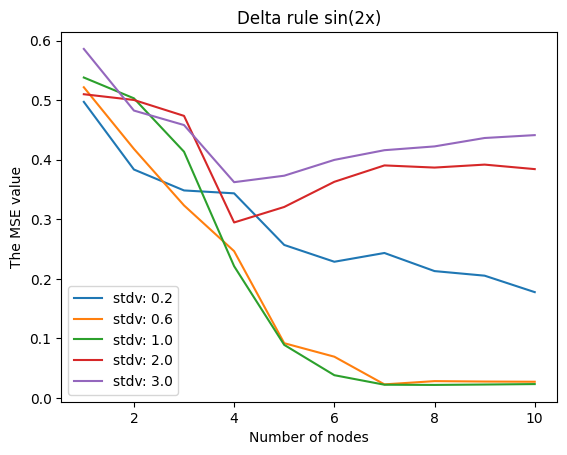

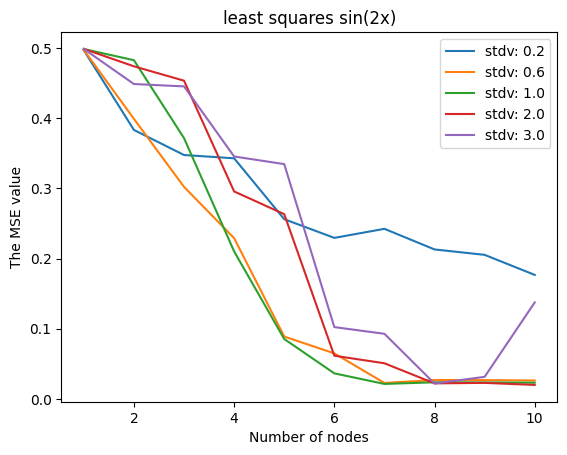

In [62]:
#sin(2x)
for i in range(len(stdv)):
  plt.plot(nodes,errors[i], label="stdv: " + str(stdv[i]))

plt.title("Delta rule sin(2x)")
plt.xlabel("Number of nodes")
plt.ylabel("The MSE value")
plt.legend()
plt.show()


for i in range(len(stdv)):
  plt.plot(nodes,errors_rbf[i], label="stdv: " + str(stdv[i]))


plt.title("least squares sin(2x)")
plt.xlabel("Number of nodes")
plt.ylabel("The MSE value")
plt.legend()
plt.show()


In [63]:
nodes = np.arange(1,11,1)
stdv = np.array([0.2,0.6,1,2,3])
errors = np.zeros((len(stdv), len(nodes)))
errors_rbf = np.zeros((len(stdv), len(nodes)))


for i in range(len(stdv)):
  for j in range(len(nodes)):
   rbf_delta = RBF_delta(nodes[j],x_data_noise, y_data_square,stdv[i], False,0.1,10000)
   delta_phi = rbf_delta.calculate_phi_x(x_data_noise)
   rbf_delta.train(delta_phi)

   delta_phi_test = rbf_delta.calculate_phi_x(x_data_test_noise)
   y_d_pre=rbf_delta.predict(delta_phi_test)
   errors[i][j]= calculate_error(y_d_pre,y_data_square_test)


   rbf =RBF(nodes[j],x_data_noise,y_data_square,stdv[i],False)
   phi = rbf.calculate_phi_x(x_data_noise)
   rbf.train(phi)
   phi_test = rbf.calculate_phi_x(x_data_test_noise)
   y_pre=rbf.predict(phi_test)
   errors_rbf[i][j] = calculate_error(y_pre,y_data_square_test)

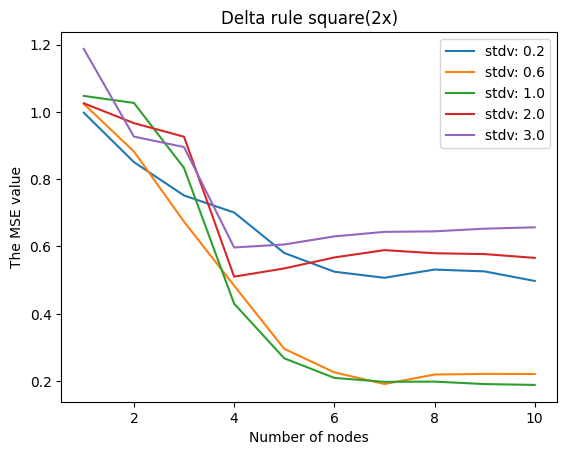

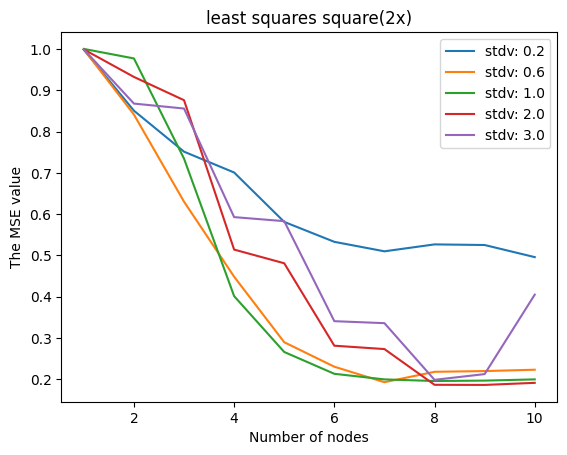

In [64]:
#square(2x)
for i in range(len(stdv)):
  plt.plot(nodes,errors[i], label="stdv: " + str(stdv[i]))

plt.title("Delta rule square(2x)")
plt.xlabel("Number of nodes")
plt.ylabel("The MSE value")
plt.legend()
plt.show()


for i in range(len(stdv)):
  plt.plot(nodes,errors_rbf[i], label="stdv: " + str(stdv[i]))


plt.title("least squares square(2x)")
plt.xlabel("Number of nodes")
plt.ylabel("The MSE value")
plt.legend()
plt.show()

What can you say about the rate of convergence and its dependence on the learning rate, eta, for the on-line learning scheme?

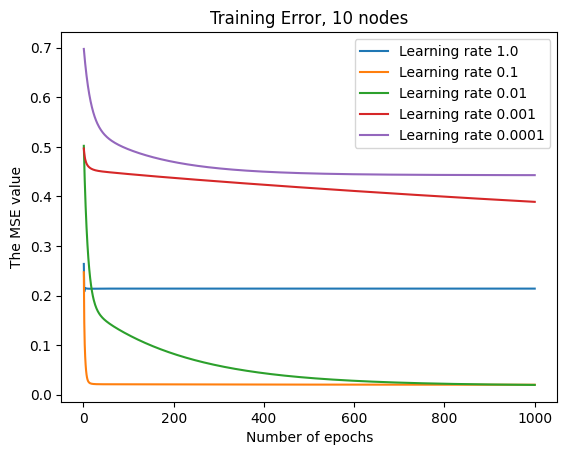

In [65]:
l_rate = np.array([1,0.1,0.01,0.001,0.0001])
error_epochs = []

for i in range(len(l_rate)):
  rbf_delta = RBF_delta(10,x_data_noise, y_data_sin,stdv[i], False,l_rate[i],1000)
  delta_phi = rbf_delta.calculate_phi_x(x_data_noise)
  e = rbf_delta.train(delta_phi)
  error_epochs.append(e)

for i in range(len(l_rate)):
 plt.plot(np.arange(1,1001,1),error_epochs[i], label="Learning rate " + str(l_rate[i]))

plt.title("Training Error, 10 nodes")
plt.xlabel("Number of epochs")
plt.ylabel("The MSE value")
plt.legend()
plt.show()

How important is the positioning of the RBF nodes in the input space? What strategy did you choose? Is it better than random positioning of the RBF nodes? Please support your conclusions with quantitative evidence (e.g., error comparison).



In [66]:
nodes = np.arange(1,11,1)
errors_my = np.zeros(len(nodes))
errors_random = np.zeros(len(nodes))
for i in range(len(nodes)):


   rbf =RBF(nodes[i],x_data_noise, y_data_sin,1,False)
   phi = rbf.calculate_phi_x(x_data_noise)
   rbf.train(phi)


   phi_test = rbf.calculate_phi_x(x_data_test_noise)
   y_pre=rbf.predict(phi_test)
   errors_my[i] = calculate_error(y_pre,y_data_sin_test)

   rbf =RBF(nodes[i],x_data_noise, y_data_sin,1,True)
   phi = rbf.calculate_phi_x(x_data_noise)
   rbf.train(phi)
   phi_test = rbf.calculate_phi_x(x_data_test_noise)
   y_pre=rbf.predict(phi_test)
   errors_random[i] = calculate_error(y_pre,y_data_sin_test)


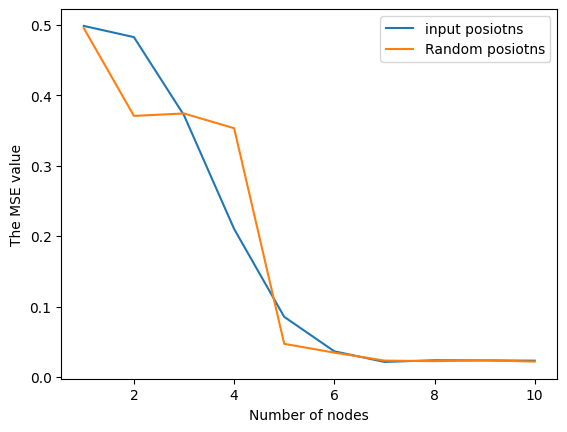

In [67]:
nodes = np.arange(1,11,1)
plt.plot(nodes,errors_my, label="input posiotns")
plt.plot(nodes, errors_random, label="Random posiotns")
plt.xlabel("Number of nodes")
plt.ylabel("The MSE value")
plt.legend()
plt.show()


Also, for the same network models estimate their test performance on the
original clean data used in section 3.1 (a corresponding test subset but
without noise) and compare your findings.

In [68]:
rbf_delta = RBF_delta(10,x_data_noise, y_data_sin,1, False,0.1,10000)
delta_phi = rbf_delta.calculate_phi_x(x_data_noise)
rbf_delta.train(delta_phi)

delta_phi = rbf_delta.calculate_phi_x(x_data_test)
y_d_pre=rbf_delta.predict(delta_phi)
print("The MSE error with delta approach for sin(2x): " + str(calculate_error(y_d_pre, y_data_sin_test)))


rbf =RBF(10,x_data_noise,y_data_sin,1,False)
phi = rbf.calculate_phi_x(x_data_noise)
rbf.train(phi)
phi_ = rbf.calculate_phi_x(x_data_test)
y_pre=rbf.predict(phi_)
print("The MSE error with least squares approach for sin(2x): " + str(calculate_error(y_pre, y_data_sin_test)))

The MSE error with delta approach for sin(2x): 0.0020208314727887294
The MSE error with least squares approach for sin(2x): 0.0015095313537018325


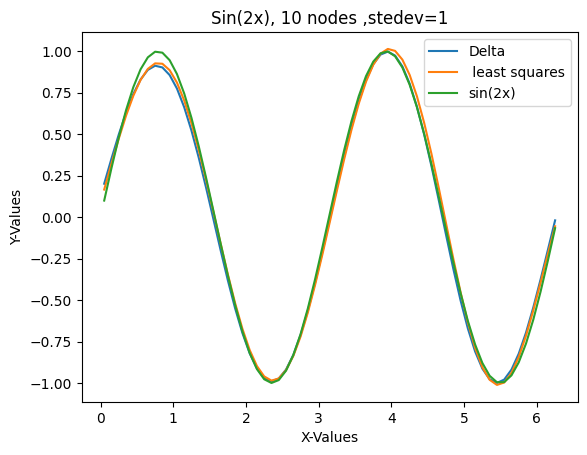

In [69]:
plt.plot(x_data_test, y_d_pre, label="Delta")
plt.plot(x_data_test, y_pre, label=" least squares")
plt.plot(x_data_test, y_data_sin_test, label="sin(2x)")
plt.title("Sin(2x), 10 nodes ,stedev=1")
plt.xlabel("X-Values")
plt.ylabel("Y-Values")
plt.legend()
plt.show()

In [70]:
rbf_delta = RBF_delta(10,x_data_noise, y_data_square,1, False,0.1,10000)
delta_phi = rbf_delta.calculate_phi_x(x_data_noise)
rbf_delta.train(delta_phi)
delta_phi = rbf_delta.calculate_phi_x(x_data_test)
y_d_pre=rbf_delta.predict(delta_phi)
print("The MSE error with delta approach for square(2x): " + str(calculate_error(y_d_pre, y_data_square_test)))



rbf =RBF(10,x_data_noise, y_data_square,1,False)
phi = rbf.calculate_phi_x(x_data_noise)
rbf.train(phi)
phi_ = rbf.calculate_phi_x(x_data_test)
y_pre=rbf.predict(phi_)
print("The MSE error with least squares approach for square(2x): " + str(calculate_error(y_pre, y_data_square_test)))



The MSE error with delta approach for square(2x): 0.1554632118337063
The MSE error with least squares approach for square(2x): 0.154569562363056


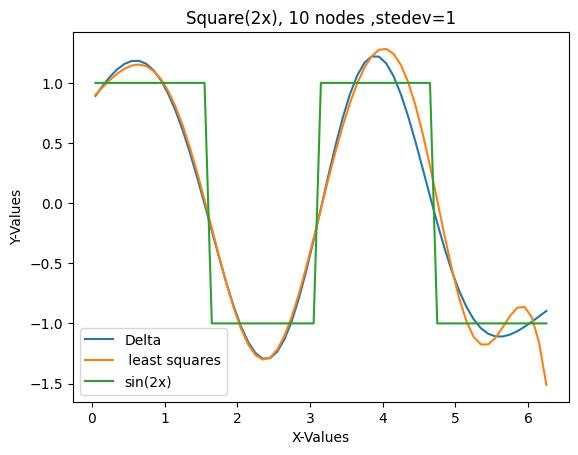

In [71]:
plt.plot(x_data_test, y_d_pre, label="Delta")
plt.plot(x_data_test, y_pre, label=" least squares")
plt.plot(x_data_test, y_data_square_test, label="sin(2x)")
plt.title("Square(2x), 10 nodes ,stedev=1")
plt.xlabel("X-Values")
plt.ylabel("Y-Values")
plt.legend()
plt.show()

In [ ]:
#done